# Assignment #6
## Dana Nave

In [272]:
# Importing Pandas and NumPy libraries into Python 
import pandas as pd
import numpy as np

In [273]:
# Create new Pandas DataFrame called Diamonds
# Read contents of a csv file from GitHub into a Diamonds 
Diamonds = pd.read_csv('https://raw.githubusercontent.com/dnave/AIM-5001/master/diamonds.csv')
# Print DataFrame to make sure data loads well
Diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [274]:
# Get statistical information of the entire DataFrame as part of data preperations
Diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Question 1:
#### What proportion of diamonds are between .30 and 1.08 carats?
In order to understand the proportion of the diamonds in the range of .30 and 1.08 I will use the value_counts method to provide the number of the diamonds in the range, and I will divide that result into the number of diamonds in the data.

In [275]:
# Create a new DataFrame called Carat_Size to save results of the value_counts pandas function
# Calling the value_counts() function to count the number of elements
Carat_Size = pd.value_counts((Diamonds['carat']>=.30) & (Diamonds['carat']<=1.08))[1]
# Print results
print('The number of diamonds between 0.30 and 1.08 are:')
print(Carat_Size)
print()
# Create a new variable Diamond_Number that contains the number of data objects in the dataset
Diamond_Number = Diamonds.shape[0]
# Printing results
print(' The number of diamonds in the dataset is')
print(Diamond_Number)
print()
# Calculating the proportion the count Result_Q1 by the Diamond_Number
Proportion_Carat = Carat_Size / Diamond_Number
print('The proportion of diamonds are between .30 and 1.08 carats is')
print(Proportion_Carat)

The number of diamonds between 0.30 and 1.08 are:
40284

 The number of diamonds in the dataset is
53940

The proportion of diamonds are between .30 and 1.08 carats is
0.7468298109010011


## Question 2:
#### How many of the diamonds have equal x and y dimensions?
In order to find how many diamonds have equal x and y dimensions, I will use the pandas value_counts method. This method will count only the elements with the same value for both x & y. 

In [276]:
# Create a new DataFrame called X_and_Y_count that will save the results of the value_counts() function
# Calling the value_counts() function to count only the values that meed the condition x=y
X_and_Y_Count = pd.value_counts((Diamonds['x'] == Diamonds['y']))[1]

# Printing results
print('The number of diamonds with equal x and y dimensions is')
print(X_and_Y_Count)

The number of diamonds with equal x and y dimensions is
17


## Question 3:
#### How many of the diamonds have a carat less than the mean carat value?
In order to solve this question, I will use the mean function and value_counts method. I will define 2 new variables: 
1) to find and save the mean number. 
2) find the number of diamonds with a carat number that is lower than the mean.

In [277]:
# Create a new DataFrame calles Mean_Carat, save the mean value of the carat column to it
Mean_Carat = Diamonds['carat'].mean()

# Create a new DataFrame Less_Then_Mean and save results of the value_counts() function
# Calling the value_counts() function to count only the diamonds that are smaller than the mean
Less_Then_Mean = pd.value_counts(Diamonds['carat'] < Mean_Carat)[1]

# Printing results
print('The number of diamonds that have a carat that is less than the mean is:')
print(Less_Then_Mean)

The number of diamonds that have a carat that is less than the mean is:
31127


## Question 4:
#### How many diamonds have a Premium cut or better?
In order to answer this question, I will use the value_counts method to find the number that meets the 2 conditions - premium and ideal cuts only.

In [278]:
# Create a new DataFrame Cut_Quality and save results of the value_counts() function
# Calling the value_counts() function to count only the diamonds that have either Premium or Ideal cut
Cut_Quality = pd.value_counts((Diamonds['cut'] == 'Premium') | (Diamonds['cut'] == 'Ideal'))[1]

# Printing results
print('The number of diamonds with a Premium or Ideal cut is:')
print(Cut_Quality)

The number of diamonds with a Premium or Ideal cut is:
35342


## Question 5:
#### Which diamond has the highest price per carat? What is its value?
In order to find the solution I will create a new column in the existing DataFrame, Diamonds. The new column will contain the result of a calculation (price / carat) to find the price per carat. Once the new column is added, I will use the max() function to find the maximum price per carat value. 

In [279]:
# Create new column called Price_per_Carat to the Diamonds DataFrame
# Add value to new column that is the result of the calculation of price divided by carat
Diamonds['Price_per_Carat'] = (Diamonds['price']/ Diamonds['carat'])
# Print DataFrame Diamonds 5 first rows to verify that the new column is added correctly
print(Diamonds.head())

# Create and save a new subset called Max_Price_per_Carat to find the maximum value of price per carat
# Call the pandas max() function to find the maximum value of the new column Price_per_Carat
Max_Price_per_Carat = np.max(Diamonds['Price_per_Carat'])
print()
# Print results
print('The highest diamond price per carat is:')
print(Max_Price_per_Carat)
print()
# Print the entire row that includes the highest price per carat in order to find which diamons it belongs to
# Set the price per carat column to be equal to the results of the new subset that finds the maximum price per carat value
print('The diamond that has the highest price per carat is:')
Diamonds[(Diamonds['Price_per_Carat'] == Max_Price_per_Carat)]

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   Price_per_Carat  
0      1417.391304  
1      1552.380952  
2      1421.739130  
3      1151.724138  
4      1080.645161  

The highest diamond price per carat is:
17828.846153846152

The diamond that has the highest price per carat is:


,carat,cut,color,clarity,depth,table,price,x,y,z,Price_per_Carat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154


## Question 6:
#### Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?
In order to plot the cut column and find the number of frequencies for each value, I will have to use the value_counts method prior to using the plot pandas function. The cut column is made of categorical data, therefore I must retrieve quantitative information out of it so that I can use it. Once I will be able to see the graph I will be able to draw a conclusion about the dataset.

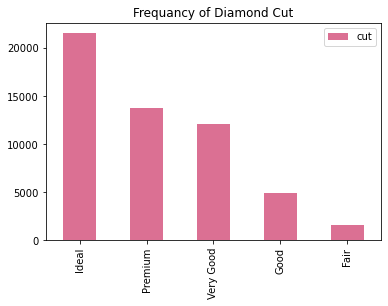

In [280]:
# Creating a new DataFrame Cut_Bar_Chart that counts
# Calling the value_counts() function to count the frequancy of each cut quality
# Calling the plot function and assign a bar chart
# Adding a title to the chart
Cut_Bar_Chart = Diamonds['cut'].value_counts().plot.bar(title = "Frequancy of Diamond Cut", color = "palevioletred")
# Adding a legend to the chart
Cut_Bar_Chart.legend(loc=1)
# Print bar chart
Cut_Bar_Chart

#### Conclusion: 
The bar plot graph clearly shows that the higher the rank of the diamond cut (fair being the lowest and ideal being the highest), the higher its frequency within the data set.


## Question 7:
#### Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.
In order to draw a conclusion about the price of the diamond per cut rank I will create 5 separate boxplots for each cut: Fair / Good / Very Good / Premium / Ideal. In order to use both data inputs, I will create new DataFrames to save the results of each price cut and then plot it. I will also create a single boxplot to show the 5 different cut ranks.

Prices of Fair Cut Diamonds


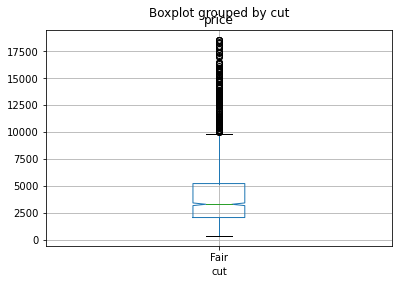

In [281]:
# Create and save a new subset called Fair_Cut that includes the data only for the fair rank dismonds
Fair_Cut = Diamonds[(Diamonds['cut']== 'Fair')]

# Call the boxplot function to visualize the price information for all the diamonds that we saved to the subset
# Add a notch indicator to have a better understanding of the median number
# Print header
print('Prices of Fair Cut Diamonds')
Fair_Cut.boxplot(column='price', by='cut', notch = True)

Prices of Good Cut Diamonds


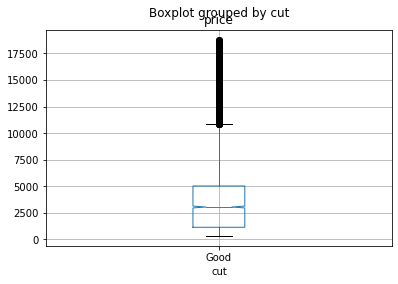

In [282]:
# Create and save a new subset called Good_Cut that includes the data only for the good rank dismonds
Good_Cut = Diamonds[(Diamonds['cut']== 'Good')]

# Call the boxplot function to visualize the price information for all the diamonds that we saved to the subset
# Add a notch indicator to have a better understanding of the median number
# Print header
print('Prices of Good Cut Diamonds')
Good_Cut.boxplot(column='price', by='cut', notch = True)


Prices of Very Good Cut Diamonds


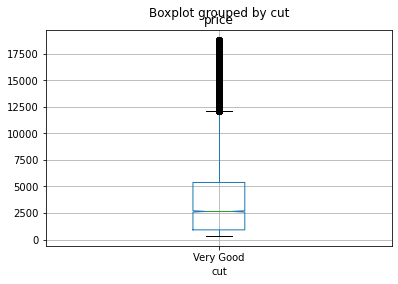

In [283]:
# Create and save a new subset called Very_Good_Cut that includes the data only for the very good rank dismonds
Very_Good_Cut = Diamonds[(Diamonds['cut']== 'Very Good')]

# Call the boxplot function to visualize the price information for all the diamonds that we saved to the subset
# Add a notch indicator to have a better understanding of the median number
# Print header
print('Prices of Very Good Cut Diamonds')
Very_Good_Cut.boxplot(column='price', by='cut', notch = True)

Prices of Premium Cut Diamonds


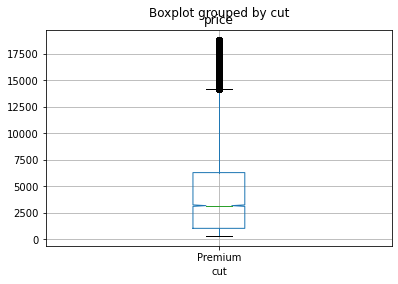

In [284]:
# Create and save a new subset called Premium_Cut that includes the data only for the Premium rank dismonds
Premium_Cut = Diamonds[(Diamonds['cut']== 'Premium')]

# Call the plotbox function to visualize the price information for all the diamonds that we saved to the subset
# Add a notch indicator to have a better understanding of the median number
# Print header
print('Prices of Premium Cut Diamonds')
Premium_Cut.boxplot(column='price', by='cut', notch = True)

Prices of Ideal Cut Diamonds


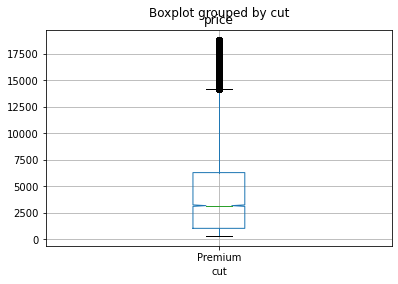

In [285]:
# Create and save a new subset called Ideal_Cut that includes the data only for the Ideal rank dismonds
Ideal_Cut = Diamonds[(Diamonds['cut']== 'Premium')]

# Call the boxplot function to visualize the price information for all the diamonds that we saved to the subset
# Add a notch indicator to have a better understanding of the median number
# Print header
print('Prices of Ideal Cut Diamonds')
Ideal_Cut.boxplot(column='price', by='cut', notch = True)

A comperison between the prices of diamonds by cut rank:


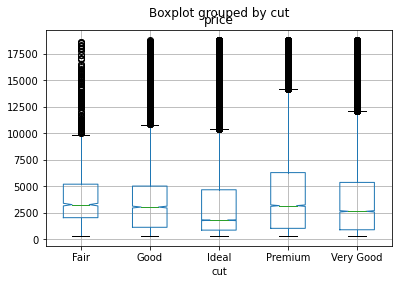

In [286]:
# Create one chart that includes the multiple boxplots that I printed seperatly according to the different cut ranks
# Calling the boxplot function to print the price values according to the cut ranks. 
# Add a notch indicator to have a better understanding of the median number
Diamonds.boxplot(column='price', by='cut', notch = True)

# Print header
print("A comperison between the prices of diamonds by cut rank:")

#### Conclusion:
From observing each of the boxplots and the final, summarizing boxplot we can see that the median prices of the 5 cut ranks are close to one another, having the Ideal cut as the lowest one. Furthermore, we can identify a significant amount of outliers in the data, and to draw the conclusion that the rank of the diamond cut alone does not indicate the price of the diamond, and that other factors in the dataset that might have a larger effect. Using boxplots we are unable to determine whether there is a substantial difference between diamonds cut ranks. In order to reach these conclusions, we should execute an ANOVA (analysis of variance) that will compare the variance of the different cuts.

## Question 8:
#### Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.
My approach when answering this question is to plot each of the 4 attributes in separate histograms and try to locate any differences between the columns that have an effect on the dataset in addition to creating a single histogram that will plot all 4 columns on one graph to help compare the results. 
Before starting to plot the graphs it is important to view the data and understand its columns:
- x = length in mm (0--10.74)
- y = width in mm (0--58.9)
- z = depth in mm (0--31.8)
- depth = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

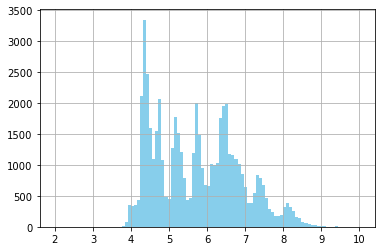

In [287]:
# Call the hist() pandas function to create a histogram from the values in the x column, the length column
Diamonds['x'].hist(color = "skyblue", range = [2,10], bins=100)


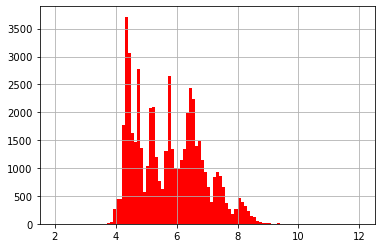

In [288]:
# Call the hist() pandas function to create a histogram from the values in the y column, the width column
Diamonds['y'].hist(color = "red", range = [2,12], bins=100)

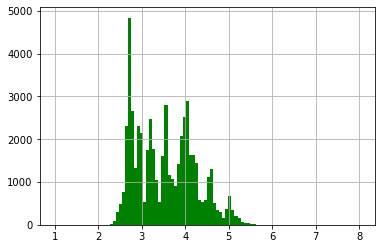

In [289]:
# Call the hist() pandas function to create a histogram from the values in the z column, the depth column
Diamonds['z'].hist(color = "green", range = [1,8], bins=100)

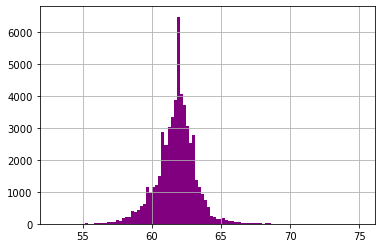

In [290]:
# Call the hist() pandas function to create a histogram from the values in the depth column, the total depth percentage column
Diamonds['depth'].hist(color = "purple", range = [53,75], bins=100)

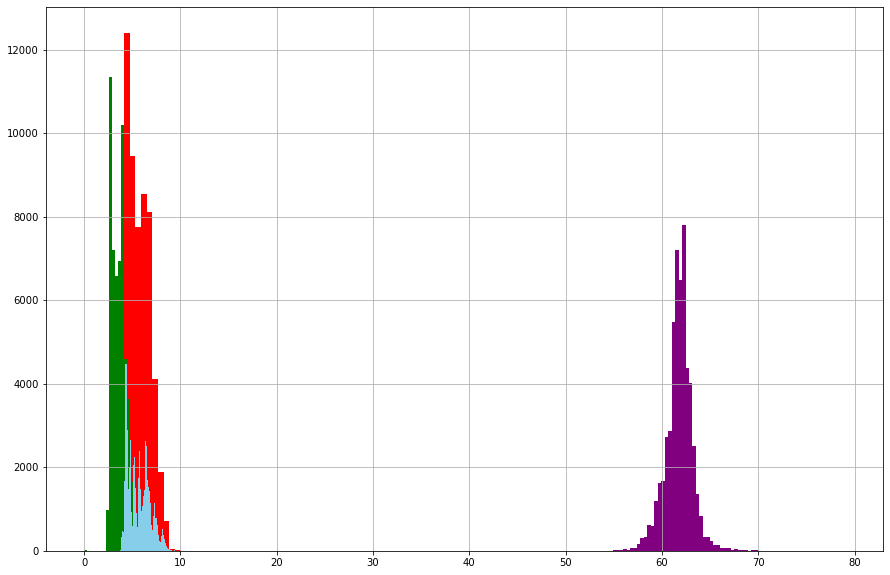

In [291]:
# Create a single histogram to compare the 4 columns: x,y,z and depth
Diamonds['y'].hist(color = "red", figsize =(15,10), bins=100)
Diamonds['z'].hist(color = "green", figsize =(15,10), bins=100)
Diamonds['depth'].hist(color = "purple", figsize =(15,10), bins=100)
Diamonds['x'].hist(color = "skyblue", figsize =(15,10), bins=100)

#### Conclusion:
The individual histograms for the length, width, and depth indicate that there is bias by the diamond producers to create diamonds above a threshold. We see a decrease just before a whole number and an increase just after a whole number. This is true for the interquartile. In both tails we see a smaller number of diamonds, this is because they are not as many very small and very large diamonds and a lot of "average" diamonds. This suggests that the distribution is normal. Furthermore, as we can see from the depth total percentage information, which uses the inputs of the three measurements, is normally distributed.     

## Question 9:
#### Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?
In order to solve this question, I will use a scatter plot using the price and carat columns. I will use the plot.scatter() function in order to be able to define my x & y-axis and not the scatterplot() function that limits my control over the graph. 

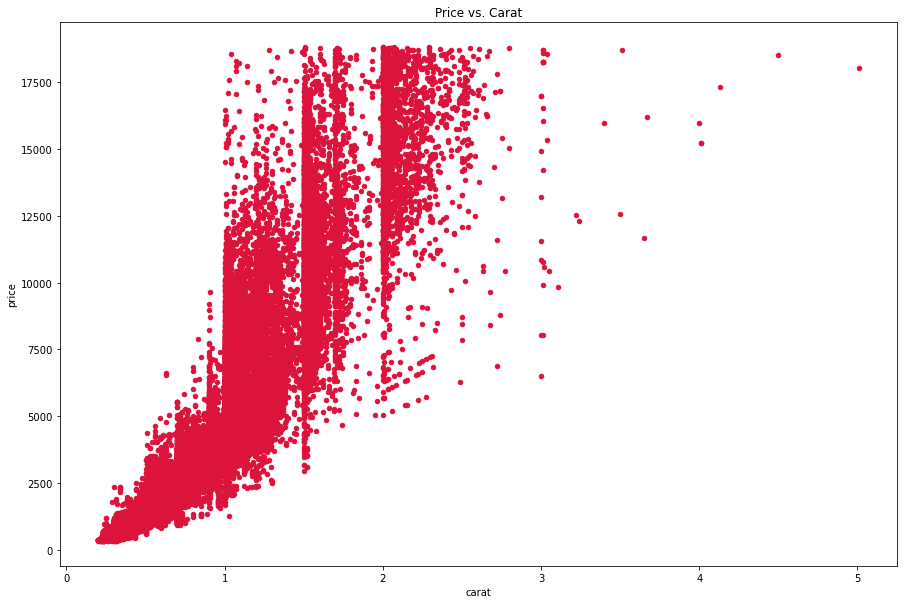

In [292]:
Diamonds.plot.scatter(x = 'carat', y = 'price', title = "Price vs. Carat", color = "crimson", figsize=(15,10))



#### Conclusion:
In conclusion, the scatterplot presents a positive relationship between carat and price. As the carat size increases, the price increases. However, we should note that the bigger the carat, the higher the price variance. In other words, there is a bigger price range for larger diamonds. This attribute decreases our ability to predict the accurate price. Moreover, we notice a significant number of outliers in the scatter plot that are different in both the price and diamond size especially above the 1-carat benchmark. In addition, we can see that there is a jump in price every 0.5 carats above the 1-carat benchmark. This suggests similarly to our observations from the previous question that there is a higher utility of diamonds just above rather than just below the 0.5 change in numbers.